TODO:

- Figure that shows distribution of words based on count

DONE:
- Check rows where all emotions labels are the same
- Remove rows with NaN values
- Remove rows with descriptions 'test' or 'stuff'
- Check rows where description is one word
- Ask Dr. K what he would like me to do in entries where the robot did nothing
- Mean/std of each of the 8 emotion pairs
- Count of word tokens in the descriptions
- Average description length (in words)
- Size of vocabulary for descriptions (with lowercase, lemmatization and checking for filtering for alpha characters)
- A nice figure that shows the mean/std of emotion pairs

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Josue-
[nltk_data]     Gaming\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
# importing package
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle
import nltk
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [2]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 150)

# Data Cleaning Functions

In [3]:
def find_rows_with_same_emotion_labels(data):
    indices = []
    for index, row in data.iterrows():
        if row['Interst/Alarm'] == row['Confusion/Understanding'] == row['Frusteration/Relief'] == row['Sorrow/Joy'] == row['Anger/Gratitude'] == row['Fear/Hope'] == row['Boredom/Surprise'] == row['Disgust/Desire']:
            print(index, '\n', row)
            indices.append(index)
    return indices

In [4]:
def drop_row(data, index):
    return data.drop(index, axis=0)

In [5]:
def find_singleton_descriptions(data):
    indices = []
    for index, row in data.iterrows():
        if len(nltk.word_tokenize(str(row['Description']))) == 1:
            print(index, '\n', row['Timestamp'], '\n', row['Description'])
        indices.append(index)

In [6]:
def find_NaN_values(data):
    return np.where(pd.isnull(data))

In [7]:
def find_empty_values(data):
    return np.where(data.applymap(lambda x: x == ''))

In [8]:
def find_rows_with_description(data, description):
    test_rows = data[data['Description']==description].index.tolist()
    return test_rows

# Data Analysis Functions

In [9]:
def mean_emotion_pairs(data):
    return data[["Interst/Alarm", "Confusion/Understanding", "Frusteration/Relief", "Sorrow/Joy", "Anger/Gratitude", "Fear/Hope", "Boredom/Surprise", "Disgust/Desire"]].mean()

In [10]:
def std_emotion_pairs(data):
    return data[["Interst/Alarm", "Confusion/Understanding", "Frusteration/Relief", "Sorrow/Joy", "Anger/Gratitude", "Fear/Hope", "Boredom/Surprise", "Disgust/Desire"]].std()

In [11]:
def graph_means_stds(means, stds, title):

    ind = np.arange(8)
    width = 0.4

    fig, ax = plt.subplots()
    ax.barh(ind, means, width, color='blue', label='Means')
    ax.barh(ind + width, stds, width, color='darkorange', label='STDs')

    ax.set(yticks=ind + width, yticklabels=['Interest/Alarm', 'Confusion/Understanding', 'Frustration/Relief', 'Sorrow/Joy', 'Anger/Gratitude', 'Fear/Hope', 'Boredom/Surprise', 'Disgust/Desire'], ylim=[2*width - 1, 8])
    ax.legend()
    plt.title(title)
    plt.show()

In [12]:
# lemmatization, lowercase, remove non alpha, remove non-english, remove numbers and stopword removal
rejected_content = []
def preprocess(row):
    filtered_content = []
    for token in nltk.word_tokenize(row['Description']):
        token = lemmatizer.lemmatize(token).lower()
        if token.isalpha():
            filtered_content.append(token) 
        
    return filtered_content

In [13]:
def analyze_descriptions(data): 
    data['Description_Tokenized'] = data.apply(lambda row: preprocess(row), axis=1)
    data['Description_Count'] = data['Description'].apply(lambda description: len(nltk.word_tokenize(description.lower())))

In [14]:
def word_frequency(data, robot):
    import itertools
    from collections import Counter
    import numpy as np
    import matplotlib.pyplot as plt
    import nltk
    from nltk.corpus import stopwords
    stop_words = set(stopwords.words('english'))
    description_tokens_stopwords = list(itertools.chain(*data['Description_Tokenized']))
    description_tokens_stopwords = [w for w in description_tokens_stopwords if not w.lower() in stop_words and w != 'robot']
    description_token_stopwords = sorted(Counter(description_tokens_stopwords).items(), key=lambda item: item[1], reverse=True)[0:10]
    x_values = []
    for token in description_token_stopwords:
        x_values.append(token[0])
    y_values = []
    for token in description_token_stopwords:
        y_values.append(token[1])

    plt.barh(x_values, y_values)
    plt.title('Word Frequency ' + robot + ' (Stop Words Removed)')
    plt.ylabel('Word')
    plt.xlabel('Quantity')

In [15]:
def word_distribution(data):
    data['Description_Count'] 

In [16]:
def count_total_tokens(data):
    return data['Description_Count'].sum()

In [17]:
def average_description_length(data):
    return data['Description_Count'].mean()

In [18]:
def vocab(data):
    return set(list(np.concatenate(data['Description_Tokenized'].values).flat))

In [19]:
def vocab_size(data):
    return len(set(list(np.concatenate(data['Description_Tokenized'].values).flat)))

In [25]:
cozmo_data = pd.read_csv('/Users/josue/Desktop/SLIM/robotbehaviordata/src/responses_cozmo copy.csv')

In [26]:
print(len(cozmo_data))
cozmo_data

653


,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617917e+09,It went to investigate a thing it saw,1,1,3,3,3,4,4,5
1,1.619714e+09,drove forward for a bit and then turned to his...,2,3,3,3,3,3,3,3
2,1.619714e+09,"just drove forward, made a little sound at the...",2,3,3,3,3,3,3,3
3,1.619714e+09,drove forward fairly quickly and then turned t...,1,3,3,3,4,4,3,4
4,1.619714e+09,looked down squinted eyes and then looked forw...,2,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
648,1.637355e+09,At first the robot tilted thier head up and sa...,1,2,3,1,3,3,3,3
649,1.637355e+09,The robot first moved straight with a slight r...,1,2,1,3,1,2,3,1
650,1.637355e+09,"At first, the robot raised their head and hand...",1,5,5,5,5,5,5,3
651,1.637355e+09,"The robot turned around nearly 180 degrees, lo...",3,4,3,1,3,1,2,3


# Clean Data

In [32]:
cozmo_data = cozmo_data.drop_duplicates(subset=['Timestamp'])
print(len(cozmo_data))
cozmo_data

629


,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617917e+09,It went to investigate a thing it saw,1,1,3,3,3,4,4,5
1,1.619714e+09,drove forward for a bit and then turned to his...,2,3,3,3,3,3,3,3
2,1.619714e+09,"just drove forward, made a little sound at the...",2,3,3,3,3,3,3,3
3,1.619714e+09,drove forward fairly quickly and then turned t...,1,3,3,3,4,4,3,4
4,1.619714e+09,looked down squinted eyes and then looked forw...,2,2,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...
648,1.637355e+09,At first the robot tilted thier head up and sa...,1,2,3,1,3,3,3,3
649,1.637355e+09,The robot first moved straight with a slight r...,1,2,1,3,1,2,3,1
650,1.637355e+09,"At first, the robot raised their head and hand...",1,5,5,5,5,5,5,3
651,1.637355e+09,"The robot turned around nearly 180 degrees, lo...",3,4,3,1,3,1,2,3


In [33]:
len(find_rows_with_same_emotion_labels(cozmo_data))

7 
 Timestamp                                                  1619714617.020491
Description                drove forward a bit and then looked down. Repl...
Interst/Alarm                                                              3
Confusion/Understanding                                                    3
Frusteration/Relief                                                        3
Sorrow/Joy                                                                 3
Anger/Gratitude                                                            3
Fear/Hope                                                                  3
Boredom/Surprise                                                           3
Disgust/Desire                                                             3
Name: 7, dtype: object
14 
 Timestamp                          1619715121.25564
Description                moved forward and turned
Interst/Alarm                                     3
Confusion/Understanding                   

42

In [35]:
drop_rows = [26, 27, 94, 143, 222, 255, 384, 405, 407, 417, 423, 574, 587]
for row in drop_rows:
    cozmo_data = drop_row(cozmo_data, row)

KeyError: '[26] not found in axis'

In [36]:
find_NaN_values(cozmo_data)

(array([], dtype=int64), array([], dtype=int64))

In [37]:
cozmo_data.iloc[37]

Timestamp                                                  1620933187.223913
Description                Eyes alternate growing larger and moving upwar...
Interst/Alarm                                                              2
Confusion/Understanding                                                    2
Frusteration/Relief                                                        3
Sorrow/Joy                                                                 3
Anger/Gratitude                                                            3
Fear/Hope                                                                  3
Boredom/Surprise                                                           3
Disgust/Desire                                                             3
Name: 43, dtype: object

In [38]:
cozmo_data = drop_row(cozmo_data, 37)

KeyError: '[37] not found in axis'

In [39]:
find_empty_values(cozmo_data)

(array([], dtype=int64), array([], dtype=int64))

In [40]:
find_singleton_descriptions(cozmo_data)

103 
 1633373656.0610828 
 interest
104 
 1633373733.466997 
 interest


In [41]:
find_rows_with_description(cozmo_data, 'test')

[]

In [42]:
len(cozmo_data)

629

In [209]:
import os
from os import listdir
from os.path import isfile, join
mypath = r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\cozmo\states'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

729


['1616770284.3265388.json',
 '1617744180.6734533.json',
 '1617744226.7789712.json',
 '1617744483.2004402.json',
 '1617915549.0748146.json',
 '1617916551.1008368.json',
 '1619635664.541669.json',
 '1619635696.0611498.json',
 '1619712825.8600764.json',
 '1619714005.860615.json',
 '1619714075.446155.json',
 '1619714179.4086607.json',
 '1619714262.2873745.json',
 '1619714376.563459.json',
 '1619714528.7705612.json',
 '1619714617.0204914.json',
 '1619714743.402876.json',
 '1619714822.1665943.json',
 '1619714886.7846465.json',
 '1619714962.1140523.json',
 '1619715039.5221138.json',
 '1619715121.25564.json',
 '1619715184.978975.json',
 '1619715256.866802.json',
 '1619715320.784347.json',
 '1619715413.37127.json',
 '1620328005.4764583.json',
 '1620329437.6045663.json',
 '1620329539.6879778.json',
 '1620329641.408831.json',
 '1620329736.1284716.json',
 '1620329831.7630644.json',
 '1620329903.5346937.json',
 '1620330514.006362.json',
 '1620330546.906945.json',
 '1620330614.639489.json',
 '162033

In [210]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [211]:
files = list(map(remove_extension, onlyfiles))
files

['1616770284.3265388',
 '1617744180.6734533',
 '1617744226.7789712',
 '1617744483.2004402',
 '1617915549.0748146',
 '1617916551.1008368',
 '1619635664.541669',
 '1619635696.0611498',
 '1619712825.8600764',
 '1619714005.860615',
 '1619714075.446155',
 '1619714179.4086607',
 '1619714262.2873745',
 '1619714376.563459',
 '1619714528.7705612',
 '1619714617.0204914',
 '1619714743.402876',
 '1619714822.1665943',
 '1619714886.7846465',
 '1619714962.1140523',
 '1619715039.5221138',
 '1619715121.25564',
 '1619715184.978975',
 '1619715256.866802',
 '1619715320.784347',
 '1619715413.37127',
 '1620328005.4764583',
 '1620329437.6045663',
 '1620329539.6879778',
 '1620329641.408831',
 '1620329736.1284716',
 '1620329831.7630644',
 '1620329903.5346937',
 '1620330514.006362',
 '1620330546.906945',
 '1620330614.639489',
 '1620330688.566884',
 '1620330778.160888',
 '1620330845.463611',
 '1620330911.8891037',
 '1620330996.1768625',
 '1620331081.1508348',
 '1620331175.9734638',
 '1620932453.9432864',
 '16209

In [212]:
len(files)

729

In [213]:
cozmo_data['Timestamp'][0]

1617916551.1008368

In [214]:
def stringify(item):
    return str(item)

In [215]:
filterer = list(cozmo_data['Timestamp'])
filterer = list(map(stringify, filterer))
filterer

['1617916551.1008368',
 '1619714005.860615',
 '1619714075.446155',
 '1619714179.408661',
 '1619714262.2873745',
 '1619714376.563459',
 '1619714528.7705612',
 '1619714617.0204914',
 '1619714743.402876',
 '1619714822.1665945',
 '1619714886.7846465',
 '1619714962.1140523',
 '1619715039.5221138',
 '1619715121.25564',
 '1619715184.978975',
 '1619715256.866802',
 '1619715320.784347',
 '1619715413.37127',
 '1620329437.6045663',
 '1620329539.6879778',
 '1620329641.408831',
 '1620329736.1284716',
 '1620329831.7630644',
 '1620329903.5346937',
 '1620330546.906945',
 '1620330614.639489',
 '1620330688.566884',
 '1620330778.160888',
 '1620330845.463611',
 '1620330911.8891037',
 '1620330996.1768625',
 '1620331081.1508348',
 '1620331175.9734638',
 '1620932710.6159298',
 '1620932829.139799',
 '1620932951.604946',
 '1620933067.640779',
 '1620933187.2239127',
 '1620933790.7912734',
 '1620933985.5401208',
 '1620934120.2088678',
 '1620934221.225111',
 '1620934364.0372007',
 '1621366843.7976303',
 '16213669

In [216]:
def json_extension(item):
    return item + ".json"

In [217]:
filtered_files_df = list(set(files) & set(filterer))
filtered_files = list(map(json_extension, filtered_files_df))
filtered_files

['1634663964.0006375.json',
 '1635524905.8064144.json',
 '1635790527.6319172.json',
 '1635795861.5654087.json',
 '1637179146.6658764.json',
 '1635788809.8960984.json',
 '1633119244.3788834.json',
 '1637355005.7755966.json',
 '1633112259.4704072.json',
 '1635201982.7492018.json',
 '1635536093.9119248.json',
 '1621366843.7976303.json',
 '1634754587.0540664.json',
 '1633536426.2694542.json',
 '1635871926.9741702.json',
 '1617916551.1008368.json',
 '1633536292.3020968.json',
 '1635186530.192599.json',
 '1635874003.6455429.json',
 '1634664905.9491842.json',
 '1633448654.8335752.json',
 '1635202279.3806012.json',
 '1637177554.6322608.json',
 '1635357445.3903377.json',
 '1633112480.6485796.json',
 '1633979097.2928472.json',
 '1633539830.1146307.json',
 '1636665436.7989087.json',
 '1636651757.931639.json',
 '1635297546.224447.json',
 '1636570662.6146927.json',
 '1635357269.1868863.json',
 '1633713835.9942634.json',
 '1635872242.547086.json',
 '1637354621.4395146.json',
 '1634755529.8362396.jso

In [218]:
filtered_out_files = list(set(filtered_files) ^ set(onlyfiles))
print(len(filtered_out_files))
filtered_out_files

182


['1633455615.6126733.json',
 '1631821302.6175566.json',
 '1635535243.2515967.json',
 '1633373733.4669967.json',
 '1633455645.4114056.json',
 '1635187499.3702881.json',
 '1632155648.6539087.json',
 '1633979339.6545765.json',
 '1633372172.967026.json',
 '1633455404.2980516.json',
 '1637177413.9386435.json',
 '1635789806.4810433.json',
 '1636652392.7933373.json',
 '1635795058.6091106.json',
 '1633456545.482485.json',
 '1633446810.4975266.json',
 '1619714179.4086607.json',
 '1637178365.9150739.json',
 '1637084344.789287.json',
 '1636137037.7433581.json',
 '1635296016.3623645.json',
 '1637167416.9719481.json',
 '1619635664.541669.json',
 '1636652468.9858677.json',
 '1637084589.678079.json',
 '1632858578.999695.json',
 '1633456510.424002.json',
 '1636135350.5921319.json',
 '1632858233.1158283.json',
 '1633980331.2519498.json',
 '1637177903.5599387.json',
 '1637168781.5698643.json',
 '1632149517.0269647.json',
 '1633539242.4000177.json',
 '1636136640.220399.json',
 '1635524373.646522.json',
 

In [219]:
print(r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\cozmo_filtered\states' + '\\')

C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\cozmo_filtered\states\


In [220]:
for file in filtered_out_files:
    os.remove(r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\cozmo_filtered\states' + '\\' + file)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\Josue-Gaming\\Desktop\\SLIM\\robotbehaviordata\\cozmo_filtered\\states\\1633455615.6126733.json'

In [221]:
len(filtered_files)

547

In [228]:
def floatify(item):
    return float(item)

In [230]:
filtered_files_df = list(map(integerfy, filtered_files_df))
len(filtered_files_df)

547

In [49]:
import os
from os import listdir
from os.path import isfile, join
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/cozmo/functions'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

730


['1633621589.0932992.txt',
 '1632251439.4356546.txt',
 '1636651823.8926218.txt',
 '1633627313.4412441.txt',
 '1633455121.194274.txt',
 '1635187003.6374369.txt',
 '1633626787.465197.txt',
 '1637179006.6438992.txt',
 '1633713346.4343357.txt',
 '1633117810.8903527.txt',
 '1635871713.5130284.txt',
 '1619714528.7705612.txt',
 '1633535654.46334.txt',
 '1635357721.1652405.txt',
 '1635188569.0176961.txt',
 '1633713750.825049.txt',
 '1633535983.827182.txt',
 '1633120147.7640712.txt',
 '1633118947.686633.txt',
 '1633456253.1397076.txt',
 '1634754743.776176.txt',
 '1635187826.9494817.txt',
 '1637084658.3332014.txt',
 '1637167839.928635.txt',
 '1635533439.3512392.txt',
 '1637177981.8117805.txt',
 '1635526714.3573322.txt',
 '1633375035.1874535.txt',
 '1633375203.7806106.txt',
 '1632160016.312735.txt',
 '1637085533.6865819.txt',
 '1635356832.297188.txt',
 '1634754587.0540664.txt',
 '1633626321.6679196.txt',
 '1621366797.368492.txt',
 '1637178552.7501688.txt',
 '1635202587.6434162.txt',
 '1634755107.

In [136]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [51]:
files = list(map(remove_extension, onlyfiles))
files

['1633621589.0932992',
 '1632251439.4356546',
 '1636651823.8926218',
 '1633627313.4412441',
 '1633455121.194274',
 '1635187003.6374369',
 '1633626787.465197',
 '1637179006.6438992',
 '1633713346.4343357',
 '1633117810.8903527',
 '1635871713.5130284',
 '1619714528.7705612',
 '1633535654.46334',
 '1635357721.1652405',
 '1635188569.0176961',
 '1633713750.825049',
 '1633535983.827182',
 '1633120147.7640712',
 '1633118947.686633',
 '1633456253.1397076',
 '1634754743.776176',
 '1635187826.9494817',
 '1637084658.3332014',
 '1637167839.928635',
 '1635533439.3512392',
 '1637177981.8117805',
 '1635526714.3573322',
 '1633375035.1874535',
 '1633375203.7806106',
 '1632160016.312735',
 '1637085533.6865819',
 '1635356832.297188',
 '1634754587.0540664',
 '1633626321.6679196',
 '1621366797.368492',
 '1637178552.7501688',
 '1635202587.6434162',
 '1634755107.1544752',
 '1637178478.0056863',
 '1636739992.467073',
 '1633448442.6108577',
 '1620329736.1284716',
 '1632861109.807809',
 '1633540383.5031803',
 '

In [52]:
len(files)

730

In [53]:
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/cozmo_filtered/states'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

547


['1634754815.151819.json',
 '1633535916.1796107.json',
 '1619715320.784347.json',
 '1637085138.7133324.json',
 '1635535704.6925564.json',
 '1634754743.776176.json',
 '1633621981.811772.json',
 '1633980539.1371036.json',
 '1636136076.4293218.json',
 '1635357585.4656572.json',
 '1633541080.0805688.json',
 '1633621909.827143.json',
 '1636665320.1009822.json',
 '1619715184.978975.json',
 '1636739992.467073.json',
 '1633119050.2864125.json',
 '1637179104.642145.json',
 '1633374034.1712818.json',
 '1636665712.3551085.json',
 '1620932829.139799.json',
 '1633449130.397215.json',
 '1635202874.9315972.json',
 '1635795729.9365082.json',
 '1634755296.8353794.json',
 '1633119859.6195972.json',
 '1635790748.5451052.json',
 '1619714376.563459.json',
 '1633113551.5419364.json',
 '1637085368.547222.json',
 '1636665436.7989087.json',
 '1637084971.0899396.json',
 '1635525549.244726.json',
 '1633119334.2058632.json',
 '1635525015.434701.json',
 '1633539830.1146307.json',
 '1633622120.3393404.json',
 '1633

In [56]:
filtered_files = list(map(remove_extension, onlyfiles))
filtered_files

['1634754815.151819',
 '1633535916.1796107',
 '1619715320.784347',
 '1637085138.7133324',
 '1635535704.6925564',
 '1634754743.776176',
 '1633621981.811772',
 '1633980539.1371036',
 '1636136076.4293218',
 '1635357585.4656572',
 '1633541080.0805688',
 '1633621909.827143',
 '1636665320.1009822',
 '1619715184.978975',
 '1636739992.467073',
 '1633119050.2864125',
 '1637179104.642145',
 '1633374034.1712818',
 '1636665712.3551085',
 '1620932829.139799',
 '1633449130.397215',
 '1635202874.9315972',
 '1635795729.9365082',
 '1634755296.8353794',
 '1633119859.6195972',
 '1635790748.5451052',
 '1619714376.563459',
 '1633113551.5419364',
 '1637085368.547222',
 '1636665436.7989087',
 '1637084971.0899396',
 '1635525549.244726',
 '1633119334.2058632',
 '1635525015.434701',
 '1633539830.1146307',
 '1633622120.3393404',
 '1633118947.686633',
 '1635357269.1868863',
 '1635201982.7492018',
 '1619714743.402876',
 '1635187003.6374369',
 '1633540513.5568132',
 '1637178623.6813865',
 '1635186842.6616993',
 '16

In [66]:
filtered_out_files = list(set(filtered_files) ^ set(files))
print(len(filtered_out_files))
filtered_out_files.remove('.DS_Store')
filtered_out_files

183


['1636137563.6290185',
 '1633713537.2855341',
 '1633980609.3161724',
 '1632858233.1158283',
 '1635188569.0176961',
 '1633455916.06314',
 '1635535243.2515967',
 '1635357721.1652405',
 '1635873648.2912703',
 '1633110243.6970224',
 '1636136640.220399',
 '1616770284.3265388',
 '1633455219.3420935',
 '1635187499.3702881',
 '1637353852.8201723',
 '1637167500.4317503',
 '1629217970.5492811',
 '1636136226.607672',
 '1636136914.6546113',
 '1633449671.7211785',
 '1633446810.4975266',
 '1637085624.5810027',
 '1635534487.7207983',
 '1631821302.6175566',
 '1636134774.9798245',
 '1632155648.6539087',
 '1633979933.9726877',
 '1636134803.6332793',
 '1635794678.9116817',
 '1621366945.5782313',
 '1634755650.4528565',
 '1637178365.9150739',
 '1637086055.2379405',
 '1633454817.7523522',
 '1634662010.0318894',
 '1633455788.1545172',
 '1634664077.1377447',
 '1633539508.5466495',
 '1635794729.9939735',
 '1633455121.194274',
 '1637168361.7293677',
 '1633456665.9931312',
 '1633117844.9395752',
 '1632420623.205

In [67]:
def txt_extension(item):
    return item + ".txt"

In [68]:
filtered_out_files = list(map(txt_extension, filtered_out_files))
filtered_out_files

['1636137563.6290185.txt',
 '1633713537.2855341.txt',
 '1633980609.3161724.txt',
 '1632858233.1158283.txt',
 '1635188569.0176961.txt',
 '1633455916.06314.txt',
 '1635535243.2515967.txt',
 '1635357721.1652405.txt',
 '1635873648.2912703.txt',
 '1633110243.6970224.txt',
 '1636136640.220399.txt',
 '1616770284.3265388.txt',
 '1633455219.3420935.txt',
 '1635187499.3702881.txt',
 '1637353852.8201723.txt',
 '1637167500.4317503.txt',
 '1629217970.5492811.txt',
 '1636136226.607672.txt',
 '1636136914.6546113.txt',
 '1633449671.7211785.txt',
 '1633446810.4975266.txt',
 '1637085624.5810027.txt',
 '1635534487.7207983.txt',
 '1631821302.6175566.txt',
 '1636134774.9798245.txt',
 '1632155648.6539087.txt',
 '1633979933.9726877.txt',
 '1636134803.6332793.txt',
 '1635794678.9116817.txt',
 '1621366945.5782313.txt',
 '1634755650.4528565.txt',
 '1637178365.9150739.txt',
 '1637086055.2379405.txt',
 '1633454817.7523522.txt',
 '1634662010.0318894.txt',
 '1633455788.1545172.txt',
 '1634664077.1377447.txt',
 '163

In [70]:
for file in filtered_out_files:
    os.remove('/Users/josue/Desktop/SLIM/robotbehaviordata/cozmo_filtered/functions' + '/' + file)

In [72]:
len(filtered_files)

547

In [43]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [44]:
def floatify(item):
    return float(item)

In [45]:
import os
from os import listdir
from os.path import isfile, join
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/cozmo_filtered/functions'
filtered_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filtered_files = list(map(remove_extension, filtered_files))
filtered_files.remove('.DS_Store')
filtered_files = list(map(floatify, filtered_files))
filtered_files

[1633621589.0932992,
 1632251439.4356546,
 1636651823.8926218,
 1635187003.6374369,
 1633626787.465197,
 1637179006.6438992,
 1633713346.4343357,
 1635871713.5130284,
 1619714528.7705612,
 1633535654.46334,
 1633713750.825049,
 1633535983.827182,
 1633120147.7640712,
 1633118947.686633,
 1634754743.776176,
 1637084658.3332014,
 1637167839.928635,
 1637177981.8117805,
 1635526714.3573322,
 1633375035.1874535,
 1633375203.7806106,
 1632160016.312735,
 1634754587.0540664,
 1633626321.6679196,
 1637178552.7501688,
 1635202587.6434162,
 1634755107.1544752,
 1637178478.0056863,
 1636739992.467073,
 1620329736.1284716,
 1620330546.906945,
 1637178767.0110855,
 1637085368.547222,
 1637177667.5838385,
 1636136819.072025,
 1635795137.2434382,
 1637085138.7133324,
 1636136076.4293218,
 1635796712.5072708,
 1636651226.5628672,
 1634754668.6211534,
 1619714617.0204914,
 1634754207.353481,
 1635357888.5857265,
 1633714110.3616202,
 1636570155.3558366,
 1635202092.8700051,
 1619714376.563459,
 163520

In [48]:
cozmo_data = cozmo_data[cozmo_data['Timestamp'].isin(filtered_files)]
cozmo_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617917e+09,It went to investigate a thing it saw,1,1,3,3,3,4,4,5
1,1.619714e+09,drove forward for a bit and then turned to his...,2,3,3,3,3,3,3,3
2,1.619714e+09,"just drove forward, made a little sound at the...",2,3,3,3,3,3,3,3
4,1.619714e+09,looked down squinted eyes and then looked forw...,2,2,3,3,3,3,3,3
5,1.619714e+09,"lifted front part up, moved forward and turned...",4,3,3,3,2,3,4,3
...,...,...,...,...,...,...,...,...,...,...
648,1.637355e+09,At first the robot tilted thier head up and sa...,1,2,3,1,3,3,3,3
649,1.637355e+09,The robot first moved straight with a slight r...,1,2,1,3,1,2,3,1
650,1.637355e+09,"At first, the robot raised their head and hand...",1,5,5,5,5,5,5,3
651,1.637355e+09,"The robot turned around nearly 180 degrees, lo...",3,4,3,1,3,1,2,3


In [50]:
cozmo_data.to_pickle('cozmo_filtered_data.pkl')

In [49]:
len(cozmo_data)

547

# Analyze Data

In [232]:
means_cozmo = mean_emotion_pairs(cozmo_data)
means_cozmo

Interst/Alarm              2.396709
Confusion/Understanding    2.784278
Frusteration/Relief        2.915905
Sorrow/Joy                 2.899452
Anger/Gratitude            2.956124
Fear/Hope                  3.073126
Boredom/Surprise           3.082267
Disgust/Desire             3.131627
dtype: float64

In [233]:
stds_cozmo = std_emotion_pairs(cozmo_data)
stds_cozmo

Interst/Alarm              1.045586
Confusion/Understanding    0.993149
Frusteration/Relief        0.770485
Sorrow/Joy                 0.857492
Anger/Gratitude            0.701838
Fear/Hope                  0.749939
Boredom/Surprise           0.820187
Disgust/Desire             0.841378
dtype: float64

In [234]:
stds_cozmo/means_cozmo

Interst/Alarm              0.436259
Confusion/Understanding    0.356699
Frusteration/Relief        0.264235
Sorrow/Joy                 0.295743
Anger/Gratitude            0.237418
Fear/Hope                  0.244031
Boredom/Surprise           0.266099
Disgust/Desire             0.268671
dtype: float64

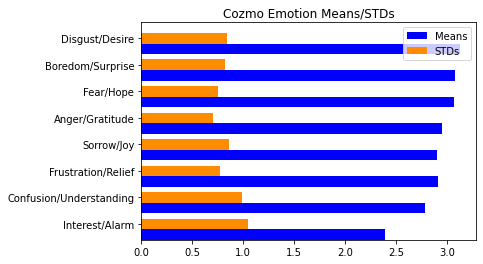

In [536]:
graph_means_stds(means_cozmo.values, stds_cozmo.values, 'Cozmo Emotion Means/STDs')

In [236]:
analyze_descriptions(cozmo_data)

<ipython-input-94-de1fd36b5cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description_Tokenized'] = data.apply(lambda row: preprocess(row), axis=1)
<ipython-input-94-de1fd36b5cdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description_Count'] = data['Description'].apply(lambda description: len(nltk.word_tokenize(description.lower())))


In [237]:
count_total_tokens(cozmo_data)

8349

In [238]:
average_description_length(cozmo_data)

15.263254113345521

In [239]:
vocab(cozmo_data)

{'a',
 'aaaah',
 'aah',
 'aahm',
 'about',
 'above',
 'abut',
 'ace',
 'acted',
 'actually',
 'ad',
 'afraid',
 'after',
 'again',
 'aggressively',
 'ah',
 'ahead',
 'ahh',
 'ahhm',
 'ahum',
 'alarm',
 'alarmed',
 'alert',
 'all',
 'almost',
 'already',
 'also',
 'always',
 'am',
 'amount',
 'an',
 'and',
 'angrily',
 'angry',
 'announcing',
 'annoyed',
 'another',
 'anything',
 'anywhere',
 'appeared',
 'appendage',
 'approached',
 'are',
 'arm',
 'arms',
 'around',
 'asked',
 'asking',
 'assertive',
 'assertively',
 'associated',
 'at',
 'attention',
 'aw',
 'away',
 'aww',
 'awww',
 'awwwww',
 'ayy',
 'ayyychemm',
 'back',
 'barely',
 'be',
 'became',
 'because',
 'becomes',
 'been',
 'before',
 'behavior',
 'besides',
 'better',
 'between',
 'big',
 'bit',
 'bleh',
 'blinked',
 'bored',
 'both',
 'boy',
 'brief',
 'bringing',
 'bro',
 'brow',
 'bruh',
 'but',
 'by',
 'calmly',
 'came',
 'carry',
 'ceiling',
 'champ',
 'change',
 'charger',
 'charging',
 'cheering',
 'circle',
 'cla

In [240]:
vocab_size(cozmo_data)

622

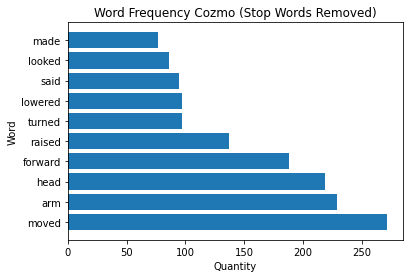

In [543]:
word_frequency(cozmo_data, 'Cozmo')

In [51]:
misty_data = pd.read_csv('/Users/josue/Desktop/SLIM/robotbehaviordata/src/response_misty copy.csv')

In [52]:
misty_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617741e+09,test,1,1,1,1,1,1,1,1
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...
639,1.637353e+09,Misty raised her hed up and down a few times. ...,5,1,2,3,3,1,5,3
640,1.637353e+09,"At first the robot made heart eyes and said ""a...",1,1,2,5,5,5,5,5
641,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4
642,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4


# Clean Data

In [53]:
len(misty_data)

644

In [54]:
ids = misty_data['Timestamp']

In [55]:
misty_data.iloc[88]['Timestamp']

1630445499.9557931

In [56]:
misty_data = misty_data.drop_duplicates(subset=['Timestamp'])
print(len(misty_data))
misty_data

617


,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
0,1.617741e+09,test,1,1,1,1,1,1,1,1
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3
...,...,...,...,...,...,...,...,...,...,...
638,1.637353e+09,"The robot said ""um"" and raised its eyebrow and...",4,1,1,3,1,2,5,2
639,1.637353e+09,Misty raised her hed up and down a few times. ...,5,1,2,3,3,1,5,3
640,1.637353e+09,"At first the robot made heart eyes and said ""a...",1,1,2,5,5,5,5,5
641,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4


In [57]:
len(misty_data)

617

In [58]:
len(find_rows_with_same_emotion_labels(misty_data))

0 
 Timestamp                  1617740862.261658
Description                             test
Interst/Alarm                              1
Confusion/Understanding                    1
Frusteration/Relief                        1
Sorrow/Joy                                 1
Anger/Gratitude                            1
Fear/Hope                                  1
Boredom/Surprise                           1
Disgust/Desire                             1
Name: 0, dtype: object
66 
 Timestamp                  1630352955.434929
Description                             test
Interst/Alarm                              1
Confusion/Understanding                    1
Frusteration/Relief                        1
Sorrow/Joy                                 1
Anger/Gratitude                            1
Fear/Hope                                  1
Boredom/Surprise                           1
Disgust/Desire                             1
Name: 66, dtype: object
76 
 Timestamp                  1630421538.5

23

In [59]:
drop_rows = [76]
for row in drop_rows:
    misty_data = drop_row(misty_data, row)

In [60]:
find_NaN_values(misty_data)

(array([], dtype=int64), array([], dtype=int64))

In [61]:
find_empty_values(misty_data)

(array([], dtype=int64), array([], dtype=int64))

In [62]:
find_singleton_descriptions(misty_data)

0 
 1617740862.2616577 
 test
66 
 1630352955.4349294 
 test
95 
 1630515062.8258655 
 confusion
98 
 1630520960.1284945 
 angery
108 
 1630601534.3583376 
 Sadness
121 
 1631134897.8837693 
 confused

139 
 1633113586.5666468 
 f
175 
 1633371901.3289552 
 confusion
177 
 1633372138.351581 
 curiosity 
181 
 1633372445.1713097 
 examination 
185 
 1633372777.6040866 
 awestruk
186 
 1633372844.241636 
 awkward
192 
 1633373363.4952807 
 confusion
194 
 1633373531.5608878 
 confusion
472 
 1635793253.7075171 
 Greeting 
473 
 1635793556.2197733 
 Agreeing 
474 
 1635793657.0961187 
 Welcoming 
475 
 1635793746.7843857 
 Confirming 
477 
 1635794002.9874015 
 Welcoming 


In [63]:
misty_data = drop_row(misty_data, 139)

In [64]:
find_rows_with_description(misty_data, 'test')

[0, 66]

In [65]:
misty_data = drop_row(misty_data, 0)

In [66]:
misty_data = drop_row(misty_data, 66)

In [67]:
len(misty_data)

613

In [235]:
import os
from os import listdir
from os.path import isfile, join
mypath = r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\misty\states'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

700


['1617740862.2616577.json',
 '1617744562.2053492.json',
 '1617744656.2184825.json',
 '1617916218.1029148.json',
 '1617916426.4783866.json',
 '1619635328.2364495.json',
 '1619712443.4991474.json',
 '1619712628.7415078.json',
 '1619712728.844478.json',
 '1619712845.8391554.json',
 '1619712970.3190892.json',
 '1619713078.9823556.json',
 '1619713187.696467.json',
 '1619713371.3021836.json',
 '1619713561.6655798.json',
 '1619713640.524142.json',
 '1619713725.02319.json',
 '1619713844.9509923.json',
 '1620327653.7826488.json',
 '1620327756.0079668.json',
 '1620327916.9659173.json',
 '1620328046.428543.json',
 '1620328165.9979303.json',
 '1620328315.7865946.json',
 '1620328380.9316356.json',
 '1620328477.482601.json',
 '1620328561.1314175.json',
 '1620328647.6332474.json',
 '1620328735.603643.json',
 '1620328843.3394911.json',
 '1620328918.658034.json',
 '1620329044.7350082.json',
 '1620329156.46939.json',
 '1620329271.8323858.json',
 '1620932268.0704777.json',
 '1620932333.4323568.json',
 '1

In [236]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [237]:
files = list(map(remove_extension, onlyfiles))
files

['1617740862.2616577',
 '1617744562.2053492',
 '1617744656.2184825',
 '1617916218.1029148',
 '1617916426.4783866',
 '1619635328.2364495',
 '1619712443.4991474',
 '1619712628.7415078',
 '1619712728.844478',
 '1619712845.8391554',
 '1619712970.3190892',
 '1619713078.9823556',
 '1619713187.696467',
 '1619713371.3021836',
 '1619713561.6655798',
 '1619713640.524142',
 '1619713725.02319',
 '1619713844.9509923',
 '1620327653.7826488',
 '1620327756.0079668',
 '1620327916.9659173',
 '1620328046.428543',
 '1620328165.9979303',
 '1620328315.7865946',
 '1620328380.9316356',
 '1620328477.482601',
 '1620328561.1314175',
 '1620328647.6332474',
 '1620328735.603643',
 '1620328843.3394911',
 '1620328918.658034',
 '1620329044.7350082',
 '1620329156.46939',
 '1620329271.8323858',
 '1620932268.0704777',
 '1620932333.4323568',
 '1620932676.2757542',
 '1620932743.7349234',
 '1620932818.4219623',
 '1620933646.0537944',
 '1620933719.941767',
 '1620933794.66079',
 '1620933796.5274596',
 '1620934506.1418002',
 '

In [238]:
len(files)

700

In [239]:
misty_data['Timestamp'][1]

1617916426.4783866

In [240]:
def stringify(item):
    return str(item)

In [241]:
filterer = list(misty_data['Timestamp'])
filterer = list(map(stringify, filterer))
filterer

['1617916426.4783866',
 '1619712628.7415078',
 '1619712728.844478',
 '1619712845.8391554',
 '1619712970.3190892',
 '1619713078.9823556',
 '1619713187.696467',
 '1619713371.3021836',
 '1619713561.6655798',
 '1619713640.524142',
 '1619713725.02319',
 '1619713844.9509923',
 '1620327916.965917',
 '1620328046.428543',
 '1620328165.9979303',
 '1620328315.7865946',
 '1620328380.9316356',
 '1620328477.482601',
 '1620328561.1314175',
 '1620328647.6332474',
 '1620328735.603643',
 '1620328843.3394911',
 '1620328918.658034',
 '1620329044.7350082',
 '1620329156.46939',
 '1620329271.8323858',
 '1620933646.0537944',
 '1620933719.941767',
 '1620933796.5274596',
 '1620934506.1418002',
 '1620934559.4357548',
 '1620934663.8111324',
 '1620934817.7313988',
 '1620934918.9955094',
 '1620935027.470034',
 '1620935098.9348276',
 '1620935239.902443',
 '1620935378.751057',
 '1620935473.1138062',
 '1620935616.9191256',
 '1620935676.655886',
 '1620935755.9738705',
 '1620935828.1042309',
 '1621364935.019199',
 '1621

In [242]:
def json_extension(item):
    return item + ".json"

In [243]:
filtered_files_df = list(set(files) & set(filterer))
filtered_files = list(map(json_extension, filtered_files_df))
filtered_files

['1637176210.6131654.json',
 '1619713561.6655798.json',
 '1636663729.3602796.json',
 '1633114293.3644223.json',
 '1633978537.0455549.json',
 '1636144680.5251803.json',
 '1621366445.6549408.json',
 '1633534492.803137.json',
 '1633533142.219311.json',
 '1637176633.8089478.json',
 '1636133726.8295944.json',
 '1620935616.9191256.json',
 '1635354852.4328065.json',
 '1637176097.1854422.json',
 '1636663315.7432828.json',
 '1633542450.1152313.json',
 '1636663196.6608012.json',
 '1633715053.9072936.json',
 '1630448831.5201986.json',
 '1635524171.80934.json',
 '1635524297.722159.json',
 '1619713725.02319.json',
 '1630600653.376574.json',
 '1633628898.864372.json',
 '1633120205.2276628.json',
 '1620328735.603643.json',
 '1630418987.6985118.json',
 '1633533774.3522773.json',
 '1636664294.947878.json',
 '1633371901.3289552.json',
 '1637084268.0373006.json',
 '1633114428.170059.json',
 '1633372138.351581.json',
 '1636664391.6000736.json',
 '1635793853.143711.json',
 '1635533151.2743251.json',
 '1633

In [244]:
filtered_out_files = list(set(filtered_files) ^ set(onlyfiles))
print(len(filtered_out_files))
filtered_out_files

155


['1619712443.4991474.json',
 '1631107628.4939942.json',
 '1635793852.2445123.json',
 '1630526587.6612084.json',
 '1636134346.7083755.json',
 '1621364935.0191987.json',
 '1633458849.066857.json',
 '1620932268.0704777.json',
 '1620933794.66079.json',
 '1630526162.340367.json',
 '1637353467.7416635.json',
 '1633714872.8076417.json',
 '1633628407.2778625.json',
 '1620932333.4323568.json',
 '1633122375.288916.json',
 '1636738623.6878603.json',
 '1633620405.7291415.json',
 '1617916218.1029148.json',
 '1633533512.9649475.json',
 '1633120179.587203.json',
 '1633113586.5666468.json',
 '1635787774.1071823.json',
 '1633627814.8357933.json',
 '1634662884.0670013.json',
 '1632861711.6287377.json',
 '1630437851.7216175.json',
 '1635203969.4536917.json',
 '1633620656.0366483.json',
 '1633542140.1614637.json',
 '1634661360.9827886.json',
 '1631112466.5698855.json',
 '1632230537.445707.json',
 '1636650083.9880881.json',
 '1633620398.0093682.json',
 '1634752276.3422692.json',
 '1633372842.6807706.json',

In [245]:
print(r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\misty_filtered\states' + '\\')

C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\misty_filtered\states\


In [246]:
for file in filtered_out_files:
    os.remove(r'C:\Users\Josue-Gaming\Desktop\SLIM\robotbehaviordata\misty_filtered\states' + '\\' + file)

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'C:\\Users\\Josue-Gaming\\Desktop\\SLIM\\robotbehaviordata\\misty_filtered\\states\\1619712443.4991474.json'

In [247]:
len(filtered_files)

545

In [248]:
def floatify(item):
    return float(item)

In [249]:
filtered_files_df = list(map(integerfy, filtered_files_df))
len(filtered_files_df)

545

In [74]:
import os
from os import listdir
from os.path import isfile, join
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/misty/functions'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

700


['1633533142.219311.txt',
 '1637175745.609032.txt',
 '1620933646.0537944.txt',
 '1633619216.8158152.txt',
 '1636567788.6560047.txt',
 '1636738344.0665803.txt',
 '1635186387.1511445.txt',
 '1633372708.3721068.txt',
 '1630511284.1612918.txt',
 '1633121959.5246148.txt',
 '1635870374.0758376.txt',
 '1635356706.7092268.txt',
 '1637176210.6131654.txt',
 '1636738760.0401592.txt',
 '1620327756.0079668.txt',
 '1633715915.3675654.txt',
 '1621366772.2129629.txt',
 '1621366445.6549408.txt',
 '1620935378.7510567.txt',
 '1630511035.0618103.txt',
 '1635794146.6971858.txt',
 '1635793746.7843857.txt',
 '1635184773.5666318.txt',
 '1637176440.0050256.txt',
 '1637165922.8890326.txt',
 '1621367621.1821702.txt',
 '1637083101.668512.txt',
 '1636147339.9174898.txt',
 '1633447196.8691113.txt',
 '1636649645.7735868.txt',
 '1630601534.3583376.txt',
 '1635184041.7510338.txt',
 '1621366444.9143288.txt',
 '1635794406.6336322.txt',
 '1635532290.7341018.txt',
 '1634052757.5916982.txt',
 '1635204330.5657358.txt',
 '16

In [75]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [76]:
files = list(map(remove_extension, onlyfiles))
files

['1633533142.219311',
 '1637175745.609032',
 '1620933646.0537944',
 '1633619216.8158152',
 '1636567788.6560047',
 '1636738344.0665803',
 '1635186387.1511445',
 '1633372708.3721068',
 '1630511284.1612918',
 '1633121959.5246148',
 '1635870374.0758376',
 '1635356706.7092268',
 '1637176210.6131654',
 '1636738760.0401592',
 '1620327756.0079668',
 '1633715915.3675654',
 '1621366772.2129629',
 '1621366445.6549408',
 '1620935378.7510567',
 '1630511035.0618103',
 '1635794146.6971858',
 '1635793746.7843857',
 '1635184773.5666318',
 '1637176440.0050256',
 '1637165922.8890326',
 '1621367621.1821702',
 '1637083101.668512',
 '1636147339.9174898',
 '1633447196.8691113',
 '1636649645.7735868',
 '1630601534.3583376',
 '1635184041.7510338',
 '1621366444.9143288',
 '1635794406.6336322',
 '1635532290.7341018',
 '1634052757.5916982',
 '1635204330.5657358',
 '1633534729.9228733',
 '1620932818.4219623',
 '1633121087.9112053',
 '1636650083.9880881',
 '1633457998.3932464',
 '1636569277.153285',
 '1636145611.44

In [77]:
len(files)

700

In [78]:
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/misty_filtered/states'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
print(len(onlyfiles))
onlyfiles

545


['1635295262.2302427.json',
 '1633714647.3041143.json',
 '1635186210.0541382.json',
 '1633629044.181319.json',
 '1633458663.4385052.json',
 '1630436872.6859088.json',
 '1637082923.5799897.json',
 '1635532581.487057.json',
 '1621367710.4105153.json',
 '1637082539.189627.json',
 '1636664756.7384756.json',
 '1630363136.5916212.json',
 '1620328843.3394911.json',
 '1635523364.3388913.json',
 '1635794002.9874015.json',
 '1633373531.5608878.json',
 '1636143928.117736.json',
 '1633714783.9815032.json',
 '1633121713.9411807.json',
 '1636649297.1286228.json',
 '1637177094.425128.json',
 '1636663399.354504.json',
 '1630614470.4521644.json',
 '1630436521.7557144.json',
 '1633448057.9930336.json',
 '1635184825.3543909.json',
 '1634661469.926618.json',
 '1630448369.9582355.json',
 '1633714386.0854883.json',
 '1634663140.0394049.json',
 '1633446333.5487232.json',
 '1620328165.9979303.json',
 '1633447381.3514805.json',
 '1630442398.0877593.json',
 '1630600653.376574.json',
 '1635185101.3771677.json',


In [79]:
filtered_files = list(map(remove_extension, onlyfiles))
filtered_files

['1635295262.2302427',
 '1633714647.3041143',
 '1635186210.0541382',
 '1633629044.181319',
 '1633458663.4385052',
 '1630436872.6859088',
 '1637082923.5799897',
 '1635532581.487057',
 '1621367710.4105153',
 '1637082539.189627',
 '1636664756.7384756',
 '1630363136.5916212',
 '1620328843.3394911',
 '1635523364.3388913',
 '1635794002.9874015',
 '1633373531.5608878',
 '1636143928.117736',
 '1633714783.9815032',
 '1633121713.9411807',
 '1636649297.1286228',
 '1637177094.425128',
 '1636663399.354504',
 '1630614470.4521644',
 '1630436521.7557144',
 '1633448057.9930336',
 '1635184825.3543909',
 '1634661469.926618',
 '1630448369.9582355',
 '1633714386.0854883',
 '1634663140.0394049',
 '1633446333.5487232',
 '1620328165.9979303',
 '1633447381.3514805',
 '1630442398.0877593',
 '1630600653.376574',
 '1635185101.3771677',
 '1634752988.2858872',
 '1621367410.2746918',
 '1620934559.4357548',
 '1633457168.7581222',
 '1635204460.8438673',
 '1633373363.4952807',
 '1636568237.7155504',
 '1633715139.019249

In [81]:
filtered_out_files = list(set(filtered_files) ^ set(files))
print(len(filtered_out_files))
filtered_out_files

155


['1630445301.0491595',
 '1633457618.4341927',
 '1637082779.6891127',
 '1631107628.4939942',
 '1632420671.016972',
 '1633373176.7337465',
 '1635184960.5801759',
 '1632332672.7835379',
 '1629217990.777104',
 '1633620656.0366483',
 '1632328290.11991',
 '1633113548.3109705',
 '1633714872.8076417',
 '1637177203.6421247',
 '1636134031.1030107',
 '1633542140.1614637',
 '1620933794.66079',
 '1636567788.6560047',
 '1621364768.6550918',
 '1630360524.7526867',
 '1634752276.3422692',
 '1630360687.775204',
 '1637165188.7593405',
 '1637167011.8685517',
 '1637353029.4896197',
 '1633446573.1403475',
 '1617744562.2053492',
 '1633620920.0368984',
 '1632149796.036472',
 '1620932818.4219623',
 '1632861711.6287377',
 '1637177147.6073725',
 '1635523644.3762953',
 '1633372052.1952965',
 '1621366141.7856073',
 '1630421538.5235941',
 '1636569277.2525501',
 '1632858740.514963',
 '1630675938.036191',
 '1632318412.1108198',
 '1631126798.5459216',
 '1636738623.6878603',
 '1634053541.7684355',
 '1630351907.8696995'

In [82]:
def txt_extension(item):
    return item + ".txt"

In [83]:
filtered_out_files = list(map(txt_extension, filtered_out_files))
filtered_out_files

['1630445301.0491595.txt',
 '1633457618.4341927.txt',
 '1637082779.6891127.txt',
 '1631107628.4939942.txt',
 '1632420671.016972.txt',
 '1633373176.7337465.txt',
 '1635184960.5801759.txt',
 '1632332672.7835379.txt',
 '1629217990.777104.txt',
 '1633620656.0366483.txt',
 '1632328290.11991.txt',
 '1633113548.3109705.txt',
 '1633714872.8076417.txt',
 '1637177203.6421247.txt',
 '1636134031.1030107.txt',
 '1633542140.1614637.txt',
 '1620933794.66079.txt',
 '1636567788.6560047.txt',
 '1621364768.6550918.txt',
 '1630360524.7526867.txt',
 '1634752276.3422692.txt',
 '1630360687.775204.txt',
 '1637165188.7593405.txt',
 '1637167011.8685517.txt',
 '1637353029.4896197.txt',
 '1633446573.1403475.txt',
 '1617744562.2053492.txt',
 '1633620920.0368984.txt',
 '1632149796.036472.txt',
 '1620932818.4219623.txt',
 '1632861711.6287377.txt',
 '1637177147.6073725.txt',
 '1635523644.3762953.txt',
 '1633372052.1952965.txt',
 '1621366141.7856073.txt',
 '1630421538.5235941.txt',
 '1636569277.2525501.txt',
 '1632858

In [84]:
for file in filtered_out_files:
    os.remove('/Users/josue/Desktop/SLIM/robotbehaviordata/misty_filtered/functions' + '/' + file)

In [ ]:
len(filtered_files)

In [68]:
def remove_extension(file):
    return os.path.splitext(file)[0]

In [69]:
def floatify(item):
    return float(item)

In [70]:
import os
from os import listdir
from os.path import isfile, join
mypath = '/Users/josue/Desktop/SLIM/robotbehaviordata/misty_filtered/functions'
filtered_files = [f for f in listdir(mypath) if isfile(join(mypath, f))]
filtered_files = list(map(remove_extension, filtered_files))
filtered_files = list(map(floatify, filtered_files))
filtered_files

[1633533142.219311,
 1637175745.609032,
 1620933646.0537944,
 1633619216.8158152,
 1636738344.0665803,
 1635186387.1511445,
 1633372708.3721068,
 1633121959.5246148,
 1635870374.0758376,
 1635356706.7092268,
 1637176210.6131654,
 1636738760.0401592,
 1633715915.3675654,
 1621366772.2129629,
 1621366445.6549408,
 1635794146.6971858,
 1635793746.7843857,
 1635184773.5666318,
 1637176440.0050256,
 1637165922.8890326,
 1621367621.1821702,
 1637083101.668512,
 1636147339.9174898,
 1633447196.8691113,
 1636649645.7735868,
 1630601534.3583376,
 1635794406.6336322,
 1635532290.7341018,
 1634052757.5916982,
 1635204330.5657358,
 1633534729.9228733,
 1633121087.9112053,
 1633457998.3932464,
 1636145611.4432826,
 1636147915.6780207,
 1633457344.3243065,
 1636143928.117736,
 1633542341.779351,
 1634661819.2856464,
 1636738481.8551972,
 1635204460.8438673,
 1636134493.623899,
 1633715535.7624576,
 1630685089.4474115,
 1633628898.864372,
 1633715633.3287342,
 1631207959.0375462,
 1633619352.1404223,

In [71]:
misty_data = misty_data[misty_data['Timestamp'].isin(filtered_files)]
misty_data

,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3
5,1.619713e+09,one arm moved about halfway up twice head tilt...,3,3,2,2,3,3,2,3
...,...,...,...,...,...,...,...,...,...,...
636,1.637353e+09,The robot moved it head up and down a few time...,2,4,5,5,5,5,4,5
638,1.637353e+09,"The robot said ""um"" and raised its eyebrow and...",4,1,1,3,1,2,5,2
639,1.637353e+09,Misty raised her hed up and down a few times. ...,5,1,2,3,3,1,5,3
641,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4


In [73]:
misty_data.to_pickle('misty_filtered_data.pkl')

In [72]:
len(misty_data)

545

# Analyze Data

In [241]:
means_misty = mean_emotion_pairs(misty_data)
means_misty

Interst/Alarm              2.704587
Confusion/Understanding    2.862385
Frusteration/Relief        2.921101
Sorrow/Joy                 3.062385
Anger/Gratitude            2.961468
Fear/Hope                  2.994495
Boredom/Surprise           3.168807
Disgust/Desire             3.051376
dtype: float64

In [242]:
stds_misty = std_emotion_pairs(misty_data)
stds_misty

Interst/Alarm              1.239247
Confusion/Understanding    1.174702
Frusteration/Relief        0.822039
Sorrow/Joy                 0.913420
Anger/Gratitude            0.831581
Fear/Hope                  0.816853
Boredom/Surprise           1.093488
Disgust/Desire             0.864497
dtype: float64

In [243]:
stds_misty/means_misty

Interst/Alarm              0.458202
Confusion/Understanding    0.410393
Frusteration/Relief        0.281414
Sorrow/Joy                 0.298271
Anger/Gratitude            0.280800
Fear/Hope                  0.272785
Boredom/Surprise           0.345079
Disgust/Desire             0.283314
dtype: float64

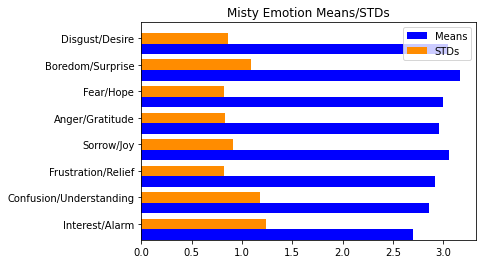

In [535]:
graph_means_stds(means_misty.values, stds_misty.values, 'Misty Emotion Means/STDs')

In [245]:
analyze_descriptions(misty_data)
misty_data

<ipython-input-94-de1fd36b5cdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description_Tokenized'] = data.apply(lambda row: preprocess(row), axis=1)
<ipython-input-94-de1fd36b5cdd>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Description_Count'] = data['Description'].apply(lambda description: len(nltk.word_tokenize(description.lower())))


,Timestamp,Description,Interst/Alarm,Confusion/Understanding,Frusteration/Relief,Sorrow/Joy,Anger/Gratitude,Fear/Hope,Boredom/Surprise,Disgust/Desire,Description_Tokenized,Description_Count
1,1.617916e+09,confused and asking for clarification almost,3,2,4,3,2,4,1,1,"[confused, and, asking, for, clarification, al...",6
2,1.619713e+09,"His eyes half closed, his head tilted up, his ...",2,4,3,3,4,4,3,5,"[his, eye, half, closed, his, head, tilted, up...",25
3,1.619713e+09,"eyes were half open, head tilted up and down s...",3,3,2,3,3,3,1,3,"[eye, were, half, open, head, tilted, up, and,...",15
4,1.619713e+09,"eyes were looking concerned to the left, then ...",3,2,3,3,3,3,4,3,"[eye, were, looking, concerned, to, the, left,...",23
5,1.619713e+09,one arm moved about halfway up twice head tilt...,3,3,2,2,3,3,2,3,"[one, arm, moved, about, halfway, up, twice, h...",20
...,...,...,...,...,...,...,...,...,...,...,...,...
636,1.637353e+09,The robot moved it head up and down a few time...,2,4,5,5,5,5,4,5,"[the, robot, moved, it, head, up, and, down, a...",28
638,1.637353e+09,"The robot said ""um"" and raised its eyebrow and...",4,1,1,3,1,2,5,2,"[the, robot, said, um, and, raised, it, eyebro...",30
639,1.637353e+09,Misty raised her hed up and down a few times. ...,5,1,2,3,3,1,5,3,"[misty, raised, her, hed, up, and, down, a, fe...",49
641,1.637354e+09,"At first, the robot said ""huh"" and looked up a...",4,2,2,3,3,3,4,4,"[at, first, the, robot, said, huh, and, looked...",48


In [246]:
count_total_tokens(misty_data)

9953

In [247]:
average_description_length(misty_data)

18.26238532110092

In [248]:
vocab(misty_data)

{'a',
 'about',
 'absolute',
 'accusing',
 'acted',
 'action',
 'actually',
 'ad',
 'adequately',
 'adorable',
 'affection',
 'afraid',
 'after',
 'afterward',
 'afterwards',
 'again',
 'agitated',
 'agreeing',
 'agreement',
 'ah',
 'ahead',
 'ahh',
 'alarmed',
 'alert',
 'all',
 'almost',
 'along',
 'also',
 'amount',
 'an',
 'and',
 'anger',
 'angery',
 'angrily',
 'angry',
 'annoyed',
 'annoying',
 'another',
 'anything',
 'apart',
 'aperture',
 'appear',
 'appeared',
 'appears',
 'apprehensive',
 'approval',
 'aquired',
 'are',
 'arm',
 'arms',
 'around',
 'aroung',
 'arrogant',
 'asking',
 'asleep',
 'asleepy',
 'assume',
 'assuming',
 'at',
 'attention',
 'attracted',
 'aw',
 'awake',
 'away',
 'awestruk',
 'awkward',
 'aww',
 'baby',
 'back',
 'backwards',
 'bad',
 'bakc',
 'barely',
 'bashful',
 'be',
 'became',
 'because',
 'before',
 'began',
 'begin',
 'behavior',
 'being',
 'believe',
 'bending',
 'bent',
 'big',
 'bigger',
 'binking',
 'bit',
 'blank',
 'blink',
 'blinked'

In [249]:
vocab_size(misty_data)

866

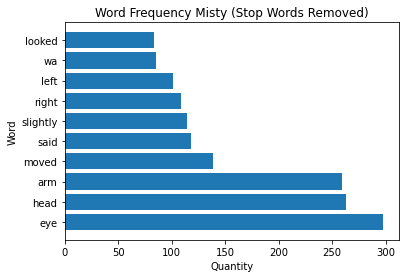

In [544]:
word_frequency(misty_data, 'Misty')

In [346]:
import os
import json
from tqdm import tqdm

In [358]:
misty_path = '/Users/josue/Desktop/SLIM/robotbehaviordata/misty_filtered/states'
misty_files = [f for f in listdir(misty_path) if isfile(join(misty_path, f))]
print(len(misty_files))
misty_files

546


['1635295262.2302427.json',
 '1633714647.3041143.json',
 '1635186210.0541382.json',
 '1633629044.181319.json',
 '1633458663.4385052.json',
 '1630436872.6859088.json',
 '1637082923.5799897.json',
 '1635532581.487057.json',
 '1621367710.4105153.json',
 '1637082539.189627.json',
 '1636664756.7384756.json',
 '1630363136.5916212.json',
 '1620328843.3394911.json',
 '1635523364.3388913.json',
 '1635794002.9874015.json',
 '1633373531.5608878.json',
 '1636143928.117736.json',
 '1633714783.9815032.json',
 '1633121713.9411807.json',
 '1636649297.1286228.json',
 '1637177094.425128.json',
 '1636663399.354504.json',
 '1630614470.4521644.json',
 '1630436521.7557144.json',
 '1633448057.9930336.json',
 '1635184825.3543909.json',
 '1634661469.926618.json',
 '1630448369.9582355.json',
 '1633714386.0854883.json',
 '1634663140.0394049.json',
 '1633446333.5487232.json',
 '1620328165.9979303.json',
 '1633447381.3514805.json',
 '1630442398.0877593.json',
 '1630600653.376574.json',
 '1635185101.3771677.json',


In [483]:
output = pd.DataFrame()
actuator_list = ['Actuator_RightArm', 'Actuator_LeftArm', 'Actuator_HeadPitch', 'Actuator_HeadRoll', 'Actuator_HeadYaw']
for filename in tqdm(misty_files):
    with open(os.path.join(misty_path,filename), 'r') as f:
        try:
            text = f.read()
        except:
            print('error')
    try:
        text = json.loads(text)
    except:
        print('error')
    for state in text['states']:
        if str(state['value']['eventName']) in actuator_list:
            append_dict = {str(state['value']['eventName']): state['value']['message']['value']}
            output = output.append(append_dict, ignore_index=True)
        else:
            output = output.append(state['value']['message'], ignore_index=True)
output

 16%|█▋        | 89/546 [00:34<04:14,  1.79it/s]

error
error


100%|██████████| 546/546 [07:10<00:00,  1.27it/s]


,created,pitch,pitchVelocity,roll,rollVelocity,sensorId,xAcceleration,yAcceleration,yaw,yawVelocity,zAcceleration,Actuator_RightArm,Actuator_LeftArm,Actuator_HeadPitch,Actuator_HeadRoll,Actuator_HeadYaw
0,2021-12-20T22:17:45.441862Z,1.48969,0.114592,0.802141,0.0,imu,0.14,-0.27,239.095288,0.0,-9.8,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.641134,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.641134,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.572958,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.572958,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67964,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.505922,NaN,NaN,NaN,NaN
67965,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,82.505922,NaN,NaN,NaN
67966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4.583662,NaN,NaN
67967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.291831,NaN


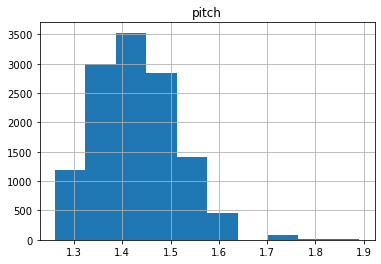

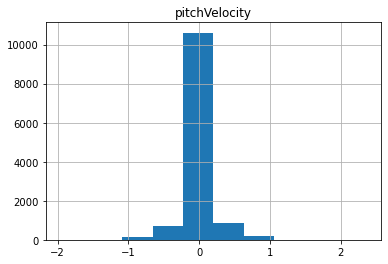

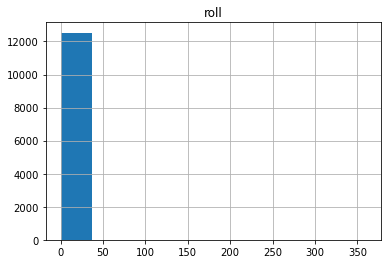

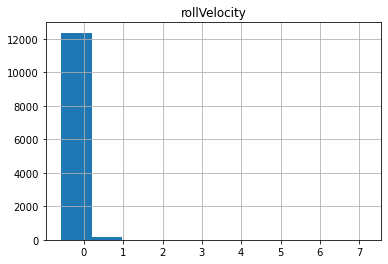

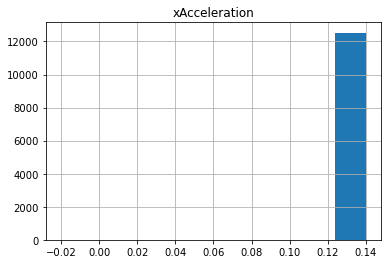

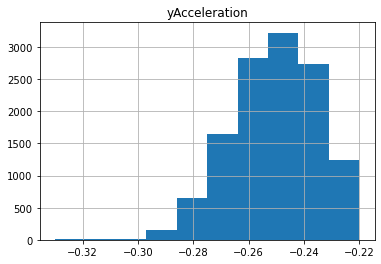

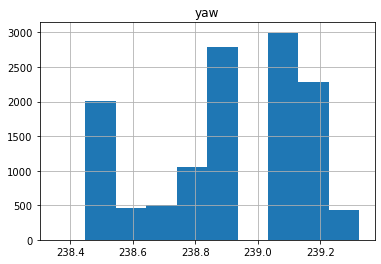

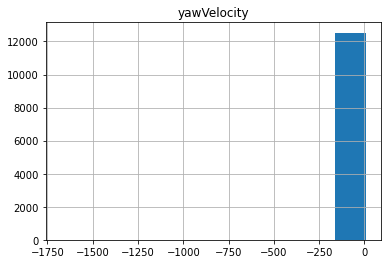

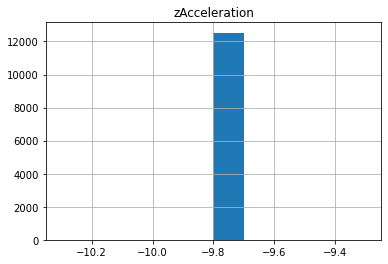

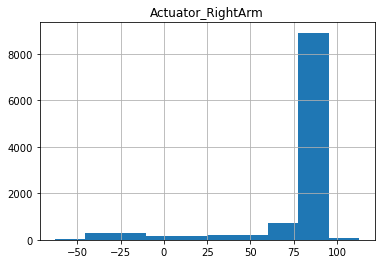

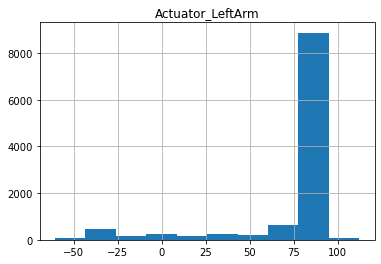

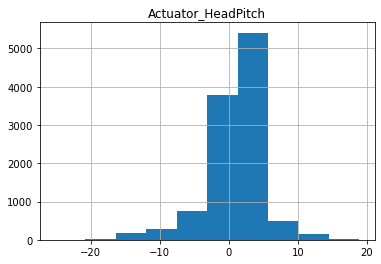

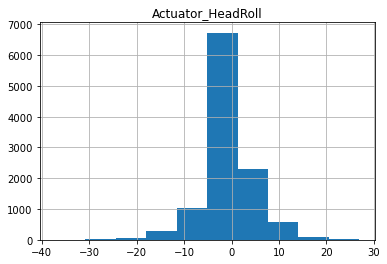

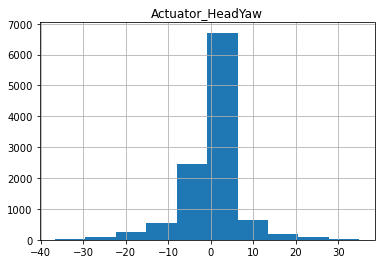

In [513]:
for column in output.columns:
    if column != 'created' and column != 'sensorId':
        hist = output.hist(column)

In [360]:
cozmo_path = '/Users/josue/Desktop/SLIM/robotbehaviordata/cozmo_filtered/states'
cozmo_files = [f for f in listdir(cozmo_path) if isfile(join(cozmo_path, f))]
print(len(cozmo_files))
cozmo_files

547


['1634754815.151819.json',
 '1633535916.1796107.json',
 '1619715320.784347.json',
 '1637085138.7133324.json',
 '1635535704.6925564.json',
 '1634754743.776176.json',
 '1633621981.811772.json',
 '1633980539.1371036.json',
 '1636136076.4293218.json',
 '1635357585.4656572.json',
 '1633541080.0805688.json',
 '1633621909.827143.json',
 '1636665320.1009822.json',
 '1619715184.978975.json',
 '1636739992.467073.json',
 '1633119050.2864125.json',
 '1637179104.642145.json',
 '1633374034.1712818.json',
 '1636665712.3551085.json',
 '1620932829.139799.json',
 '1633449130.397215.json',
 '1635202874.9315972.json',
 '1635795729.9365082.json',
 '1634755296.8353794.json',
 '1633119859.6195972.json',
 '1635790748.5451052.json',
 '1619714376.563459.json',
 '1633113551.5419364.json',
 '1637085368.547222.json',
 '1636665436.7989087.json',
 '1637084971.0899396.json',
 '1635525549.244726.json',
 '1633119334.2058632.json',
 '1635525015.434701.json',
 '1633539830.1146307.json',
 '1633622120.3393404.json',
 '1633

In [517]:
output = pd.DataFrame()
for filename in tqdm(cozmo_files):
    with open(os.path.join(cozmo_path,filename), 'r') as f:
        text = f.read()
    text = json.loads(text)
    for state in text['states']:
        output = output.append(state['value'], ignore_index=True)
output

100%|██████████| 547/547 [22:01<00:00,  2.42s/it]


,are_wheels_moving,battery_voltage,camera_config,current_accelerometer,current_action,current_behavior,current_gyro,face_count,has_in_progress_actions,head_angle,is_anim_buffer_full,is_animating,is_animating_idle,is_behavior_running,is_carrying_block,is_charging,is_cliff_detected,is_device_accelerometer_supported,is_device_gyro_supported,is_falling,is_freeplay_mode_active,is_head_in_pos,is_lift_in_pos,is_localized,is_moving,is_on_charger,is_pathing,is_picked_up,is_picking_or_placing,is_ready,left_wheel_speed,lift_angle,lift_height,lift_position,lift_ratio,loop,pose,pose_angle,pose_pitch,right_wheel_speed,robot_id,serial,timestamp
0,False,3.58795166015625,<cozmo.camera.CameraConfig object at 0x7f57041...,<Vector3 x: -3673.96 y: -210.76 z: 9117.84>,{2002860: wrapped-<SetLiftHeight state=action_...,None,<Vector3 x: -0.00 y: -0.05 z: -0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.65 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
1,False,3.58795166015625,<cozmo.camera.CameraConfig object at 0x7f57041...,<Vector3 x: -3487.75 y: -249.08 z: 9098.08>,{2002860: wrapped-<SetLiftHeight state=action_...,None,<Vector3 x: 0.00 y: -0.00 z: 0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.64 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
2,False,3.58795166015625,<cozmo.camera.CameraConfig object at 0x7f57041...,<Vector3 x: -3858.38 y: -274.83 z: 9143.59>,{2002860: wrapped-<SetLiftHeight state=action_...,None,<Vector3 x: -0.00 y: -0.00 z: -0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
3,False,3.58795166015625,<cozmo.camera.CameraConfig object at 0x7f57041...,<Vector3 x: -3710.48 y: -231.12 z: 9145.38>,{2002861: wrapped-<SetHeadAngle state=action_r...,None,<Vector3 x: 0.01 y: -0.00 z: 0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.62 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
4,False,3.58795166015625,<cozmo.camera.CameraConfig object at 0x7f57041...,<Vector3 x: -3761.98 y: -279.62 z: 9123.23>,{},None,<Vector3 x: -0.01 y: -0.00 z: -0.01>,0,False,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (

In [436]:
output.iloc[0]['current_action']

"{2002860: wrapped-<SetLiftHeight state=action_running height=77.0 max_speed=10.0 accel=10.0 duration=3>, 2002861: wrapped-<SetHeadAngle state=action_running angle=<Angle -0.44 radians (-25.00 degrees)> max_speed=10.0 accel=10.0 duration=3>, 2002869: wrapped-<SayText state=action_running text='aa!' style=3 event=575 duration=1 pitch=-0.375>, 2002872: wrapped-<SetLiftHeight state=action_running height=92.0 max_speed=10.0 accel=10.0 duration=3>}"

In [518]:
output = output.drop(['are_wheels_moving', 'camera_config', 'current_action', 'current_behavior'], 1)

In [519]:
output

,battery_voltage,current_accelerometer,current_gyro,face_count,has_in_progress_actions,head_angle,is_anim_buffer_full,is_animating,is_animating_idle,is_behavior_running,is_carrying_block,is_charging,is_cliff_detected,is_device_accelerometer_supported,is_device_gyro_supported,is_falling,is_freeplay_mode_active,is_head_in_pos,is_lift_in_pos,is_localized,is_moving,is_on_charger,is_pathing,is_picked_up,is_picking_or_placing,is_ready,left_wheel_speed,lift_angle,lift_height,lift_position,lift_ratio,loop,pose,pose_angle,pose_pitch,right_wheel_speed,robot_id,serial,timestamp
0,3.58795166015625,<Vector3 x: -3673.96 y: -210.76 z: 9117.84>,<Vector3 x: -0.00 y: -0.05 z: -0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.65 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
1,3.58795166015625,<Vector3 x: -3487.75 y: -249.08 z: 9098.08>,<Vector3 x: 0.00 y: -0.00 z: 0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,True,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.64 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
2,3.58795166015625,<Vector3 x: -3858.38 y: -274.83 z: 9143.59>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
3,3.58795166015625,<Vector3 x: -3710.48 y: -231.12 z: 9145.38>,<Vector3 x: 0.01 y: -0.00 z: 0.00>,0,True,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.62 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
4,3.58795166015625,<Vector3 x: -3761.98 y: -279.62 z: 9123.23>,<Vector3 x: -0.01 y: -0.00 z: -0.01>,0,False,<Angle -0.44 radians (-25.00 degrees)>,False,False,False,False,False,False,False,True,False,False,False,True,True,False,True,False,False,False,False,True,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38836,3.7159423828125,<Vector3 x: -1283.73 y: -250.88 z: 9738.75>,<Vector3

In [520]:
output = output.drop(output.columns[[3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]], 1)

In [521]:
output

,battery_voltage,current_accelerometer,current_gyro,head_angle,left_wheel_speed,lift_angle,lift_height,lift_position,lift_ratio,loop,pose,pose_angle,pose_pitch,right_wheel_speed,robot_id,serial,timestamp
0,3.58795166015625,<Vector3 x: -3673.96 y: -210.76 z: 9117.84>,<Vector3 x: -0.00 y: -0.05 z: -0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.65 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
1,3.58795166015625,<Vector3 x: -3487.75 y: -249.08 z: 9098.08>,<Vector3 x: 0.00 y: -0.00 z: 0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.64 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
2,3.58795166015625,<Vector3 x: -3858.38 y: -274.83 z: 9143.59>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
3,3.58795166015625,<Vector3 x: -3710.48 y: -231.12 z: 9145.38>,<Vector3 x: 0.01 y: -0.00 z: 0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.62 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
4,3.58795166015625,<Vector3 x: -3761.98 y: -279.62 z: 9123.23>,<Vector3 x: -0.01 y: -0.00 z: -0.01>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>,1,0880da46,1634754815.151819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38836,3.7159423828125,<Vector3 x: -1283.73 y: -250.88 z: 9738.75>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 ...,1.000378926595052,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 11928.72 y: 94.50 z: 0.00> ...,<Angle 0.02 radians (1.09 degrees)>,<Angle 0.03 radians (1.75 degrees)>,<Speed 0.00 mmps>,1,0880da46,1637354621.4395146
38837,3.7159423828125,<Vector3 x: -1551.37 y: -236.51 z: 9840.54>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 ...,1.000378926595052,<_UnixSelectorEventLoop running=True closed=Fa...,<Pose <Position x: 11928.72 y: 94.50 z: 0.00> ...,<Angle 0.02 radians (1.09 degrees)>,<Angle 0.03 radians (1.72 degrees)>,<Speed 0.00 mmps>,1,0880da46,1637354621.4395146
38838,3.699951171875,<Vector3 x: -1454.38 y: -253.87 z: 9784.85>,<Vector3 x: 0.00 y: 0.00 z: -0.00>,<Angle -0.

In [522]:
output = output.drop(['loop', 'robot_id', 'serial', 'timestamp'], 1)
output

,battery_voltage,current_accelerometer,current_gyro,head_angle,left_wheel_speed,lift_angle,lift_height,lift_position,lift_ratio,pose,pose_angle,pose_pitch,right_wheel_speed
0,3.58795166015625,<Vector3 x: -3673.96 y: -210.76 z: 9117.84>,<Vector3 x: -0.00 y: -0.05 z: -0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.65 degrees)>,<Speed 0.00 mmps>
1,3.58795166015625,<Vector3 x: -3487.75 y: -249.08 z: 9098.08>,<Vector3 x: 0.00 y: -0.00 z: 0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.64 degrees)>,<Speed 0.00 mmps>
2,3.58795166015625,<Vector3 x: -3858.38 y: -274.83 z: 9143.59>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>
3,3.58795166015625,<Vector3 x: -3710.48 y: -231.12 z: 9145.38>,<Vector3 x: 0.01 y: -0.00 z: 0.00>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.14 degrees)>,<Angle 0.05 radians (2.62 degrees)>,<Speed 0.00 mmps>
4,3.58795166015625,<Vector3 x: -3761.98 y: -279.62 z: 9123.23>,<Vector3 x: -0.01 y: -0.00 z: -0.01>,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,<LiftPosition height=<Distance 77.28 mm (3.04 ...,0.7547025044759115,<Pose <Position x: 26379.90 y: 3398.88 z: 0.00...,<Angle 0.16 radians (9.13 degrees)>,<Angle 0.05 radians (2.61 degrees)>,<Speed 0.00 mmps>
...,...,...,...,...,...,...,...,...,...,...,...,...,...
38836,3.7159423828125,<Vector3 x: -1283.73 y: -250.88 z: 9738.75>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 ...,1.000378926595052,<Pose <Position x: 11928.72 y: 94.50 z: 0.00> ...,<Angle 0.02 radians (1.09 degrees)>,<Angle 0.03 radians (1.75 degrees)>,<Speed 0.00 mmps>
38837,3.7159423828125,<Vector3 x: -1551.37 y: -236.51 z: 9840.54>,<Vector3 x: -0.00 y: -0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 ...,1.000378926595052,<Pose <Position x: 11928.72 y: 94.50 z: 0.00> ...,<Angle 0.02 radians (1.09 degrees)>,<Angle 0.03 radians (1.72 degrees)>,<Speed 0.00 mmps>
38838,3.699951171875,<Vector3 x: -1454.38 y: -253.87 z: 9784.85>,<Vector3 x: 0.00 y: 0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 ...,1.000378926595052,<Pose <Position x: 11928.72 y: 94.50 z: 0.00> ...,<Angle 0.02 radians (1.09 degrees)>,<Angle 0.03 radians (1.72 degrees)>,<Speed 0.00 mmps>
38839,3.6839599609375,<Vector3 x: -1492.70 y: -238.90 z: 9826.77>,<Vector3 x: -0.00 y: 0.00 z: -0.00>,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,<LiftPosition height=<Distance 92.02 mm (3.62 

In [523]:
output = output.drop(output.columns[[0, 1, 2, 7, 9, 10, 11]], 1)
output

,head_angle,left_wheel_speed,lift_angle,lift_height,lift_ratio,right_wheel_speed
0,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>
1,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>
2,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>
3,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>
4,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>
...,...,...,...,...,...,...
38836,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,1.000378926595052,<Speed 0.00 mmps>
38837,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,1.000378926595052,<Speed 0.00 mmps>
38838,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,1.000378926595052,<Speed 0.00 mmps>
38839,<Angle -0.18 radians (-10.25 degrees)>,<Speed 0.00 mmps>,<Angle 0.79 radians (45.44 degrees)>,<Distance 92.02 mm (3.62 inches)>,1.000378926595052,<Speed 0.00 mmps>


In [524]:
def extract_floats(entry):
    for token in entry.split():
        try:
            if(isinstance(float(token), float)):
                return float(token)
        except:
            pass 

In [525]:
new_output = output.applymap(extract_floats)
new_output

,head_angle,left_wheel_speed,lift_angle,lift_height,lift_ratio,right_wheel_speed
0,-0.44,0.0,0.51,77.28,0.754703,0.0
1,-0.44,0.0,0.51,77.28,0.754703,0.0
2,-0.44,0.0,0.51,77.28,0.754703,0.0
3,-0.44,0.0,0.51,77.28,0.754703,0.0
4,-0.44,0.0,0.51,77.28,0.754703,0.0
...,...,...,...,...,...,...
38836,-0.18,0.0,0.79,92.02,1.000379,0.0
38837,-0.18,0.0,0.79,92.02,1.000379,0.0
38838,-0.18,0.0,0.79,92.02,1.000379,0.0
38839,-0.18,0.0,0.79,92.02,1.000379,0.0


In [528]:
new_output.to_pickle('cozmo_states.pkl')

,head_angle,left_wheel_speed,lift_angle,lift_height,lift_ratio,right_wheel_speed
0,-0.44,0.0,0.51,77.28,0.754703,0.0
1,-0.44,0.0,0.51,77.28,0.754703,0.0
2,-0.44,0.0,0.51,77.28,0.754703,0.0
3,-0.44,0.0,0.51,77.28,0.754703,0.0
4,-0.44,0.0,0.51,77.28,0.754703,0.0
...,...,...,...,...,...,...
38836,-0.18,0.0,0.79,92.02,1.000379,0.0
38837,-0.18,0.0,0.79,92.02,1.000379,0.0
38838,-0.18,0.0,0.79,92.02,1.000379,0.0
38839,-0.18,0.0,0.79,92.02,1.000379,0.0


In [529]:
new = pd.read_pickle('cozmo_states.pkl')
new

,head_angle,left_wheel_speed,lift_angle,lift_height,lift_ratio,right_wheel_speed
0,-0.44,0.0,0.51,77.28,0.754703,0.0
1,-0.44,0.0,0.51,77.28,0.754703,0.0
2,-0.44,0.0,0.51,77.28,0.754703,0.0
3,-0.44,0.0,0.51,77.28,0.754703,0.0
4,-0.44,0.0,0.51,77.28,0.754703,0.0
...,...,...,...,...,...,...
38836,-0.18,0.0,0.79,92.02,1.000379,0.0
38837,-0.18,0.0,0.79,92.02,1.000379,0.0
38838,-0.18,0.0,0.79,92.02,1.000379,0.0
38839,-0.18,0.0,0.79,92.02,1.000379,0.0


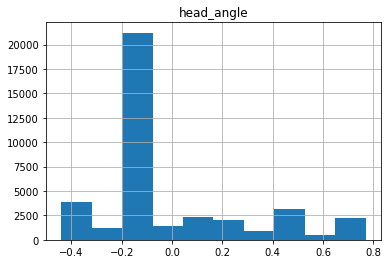

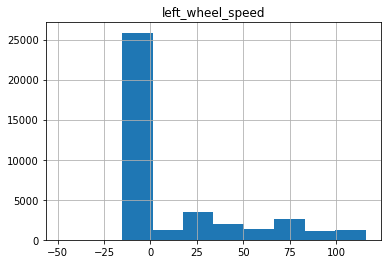

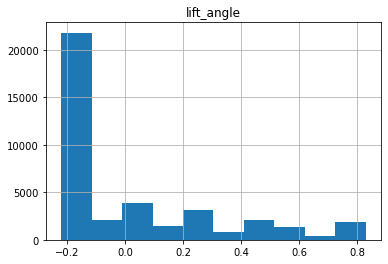

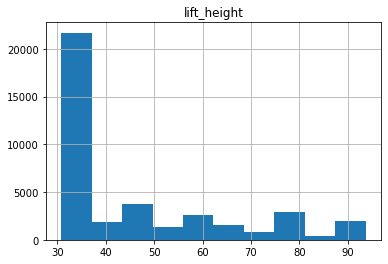

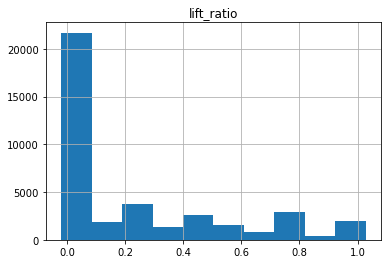

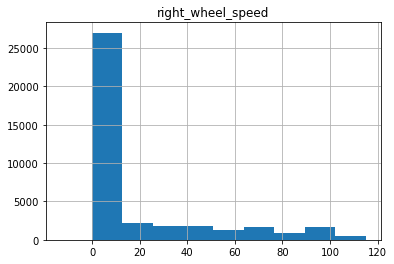

In [530]:
for column in output.columns:
    if column != 'created' and column != 'sensorId':
        hist = new_output.hist(column)

In [428]:
for column in output.iloc[0]:
    output[column] = 0
output

,head_angle,left_wheel_speed,lift_angle,lift_height,lift_ratio,right_wheel_speed,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115
0,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
1,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
2,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
3,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
4,<Angle -0.44 radians (-25.00 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
5,<Angle -0.43 radians (-24.74 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
6,<Angle -0.43 radians (-24.74 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
7,<Angle -0.43 radians (-24.74 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
8,<Angle -0.43 radians (-24.74 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
9,<Angle -0.43 radians (-24.74 degrees)>,<Speed 0.00 mmps>,<Angle 0.51 radians (29.28 degrees)>,<Distance 77.28 mm (3.04 inches)>,0.7547025044759115,<Speed 0.00 mmps>,0,0,0,0,0
